In [1]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# File to Load 
ride_data_to_load = "data/ride_data.csv"
city_data_to_load = "data/city_data.csv"

# Read the files and store into Pandas data frame
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df = pd.read_csv(city_data_to_load)




In [2]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789


In [3]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#Summarize the average fare by city
city_data_summary = ride_data_df[['city', 'fare']]
#city_data_summary.head()
fare_by_city= city_data_summary.groupby(['city'])['fare'].mean()
rides_by_city= city_data_summary.groupby(['city'])['fare'].count()
fare_by_city

city
Amandaburgh             24.641667
Barajasview             25.332273
Barronchester           36.422500
Bethanyland             32.956111
Bradshawfurt            40.064000
Brandonfort             35.437368
Carriemouth             28.314444
Christopherfurt         24.501852
Colemanland             30.894545
Davidfurt               31.995882
Deanville               25.842632
East Aaronbury          25.661111
East Danielview         31.560588
East Kaylahaven         23.757931
East Kentstad           29.823077
East Marymouth          30.835185
Erikaland               24.906667
Garzaport               24.123333
Grahamburgh             25.221200
Grayville               27.763333
Harringtonfort          33.470000
Huntermouth             28.993750
Hurleymouth             25.891429
Jerryton                25.649200
Jessicaport             36.013333
Johnton                 26.785714
Joneschester            22.289600
Josephside              32.858148
Justinberg              23.694333
Karenberg

In [5]:
#rides_by_city.head(100)
city_summary = pd.DataFrame({'average fare':fare_by_city,"total rides": rides_by_city})
city_summary.head()

#Combine the data into a single dataset
ride_share_data= pd.merge(city_summary, city_data_df, how='outer', on='city')
ride_share_data.head(10)

,city,average fare,total rides,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural
5,Brandonfort,35.437368,19,10,Suburban
6,Carriemouth,28.314444,27,52,Urban
7,Christopherfurt,24.501852,27,41,Urban
8,Colemanland,30.894545,22,23,Suburban
9,Davidfurt,31.995882,17,23,Suburban


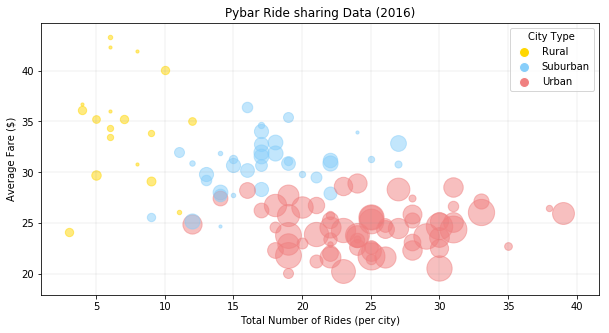

In [6]:
#Obtain the x and y coordinates for each of the three city types

def scatterplot(ride_share_data,x, y):
    
    fig, ax = plt.subplots(figsize=(10,5))
    
    #assign the color to each data point
    colors = ride_share_data['type'].replace(['Rural','Suburban','Urban'], ['gold','lightskyblue','lightcoral'])
    
    #iterate through the dataset plotting each data point and assinging it to the corresponding color and size
    for i in range (len(ride_share_data)):
        #define the size of the dot
        size = ride_share_data["driver_count"]*10
        
        #plot each dot
        plt.scatter(x.loc[i],y.loc[i], alpha=0.50, color=colors[i], s=size[i])
    
    #add labels
    plt.title('Pybar Ride sharing Data (2016)')
    plt.xlabel('Total Number of Rides (per city)')
    plt.ylabel('Average Fare ($)')
    
    #add gridlines
    ax.grid(color='grey', linestyle='-', linewidth = 0.25, alpha = 0.5) 

scatterplot(ride_share_data, ride_share_data['total rides'], ride_share_data['average fare'])

#add legend
markers = [Line2D([0], [0], marker='o', markerfacecolor='gold', label='Rural', markersize=10, color='w'), 
           Line2D([0], [0], marker='o', markerfacecolor='lightskyblue', label='Suburban', markersize=10, color='w'),
           Line2D([0], [0], marker='o', markerfacecolor='lightcoral', label='Urban', markersize=10, color='w')]
plt.legend(handles=markers, loc="best", title='City Type')   
plt.show()

In [7]:
#Total Rides by City Type
#Calculate total ride by city type
sum_rides_type = ride_share_data.groupby(["type"]).sum()

#Place the city types into a list
sum_rides_type.head()


,average fare,total rides,driver_count
type,,,
Rural,623.479771,125,78
Suburban,1106.542729,625,490
Urban,1616.942033,1625,2405


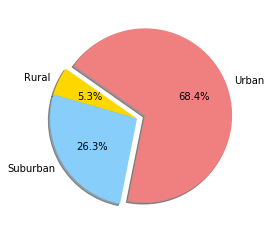

In [28]:
# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

#assign the color to each data point and assign the label
colors = ['gold', 'lightskyblue', 'lightcoral']
labels = ['Rural', 'Suburban', 'Urban']


#Build Pie Chart
ride_city_type = plt.pie(sum_rides_type['total rides'],explode=explode, labels=labels, 
           colors=colors, autopct="%1.1f%%",startangle=145, shadow = True)
plt.show()

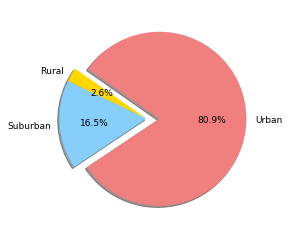

In [32]:
#Total Drivers by City Type
#Calculate Driver Percents
#Build Pie Chart
explode = (0, 0, 0.15)
ride_driver= plt.pie(sum_rides_type['driver_count'],explode=explode, labels=labels, 
           colors=colors, autopct="%1.1f%%",startangle=145,textprops={'fontsize': 9}, shadow=True)
plt.show()